## Determine Nitrous Oxide Flux from Sorgum Cropping Systems in the Great Plains - Kathy Gehl

### Project background

#### This project generates a large amount of N2O gas measurements over the growing season at multiple locations. Each sampling event is sampled over a time sequence of 0, 15, 30, and 45 minutes. Measured N2O concentrations are linearly regressed against the time sequence and the slope is considered the N2O flux for that plot on each sampling date. Linear extrapolation is used to estimate flux between sampling points and then season-long emissions are estimated. We currently have been performing these calculations in Excel, but having a code in place would streamline the process and would help reduce human errors.

In [56]:
#Import modules

import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [57]:
#Access the data file

dataset_dir = '/Users/kgehl/Desktop/Coding/Project/'
glob.os.chdir(dataset_dir)

In [58]:
#Creating the dataframe and renaming/cleaning up some of the raw columns

N2O = pd.read_csv('Sample_data_set2.csv', sep=',')   #Creates the initial Data frame of N2O
N2Ob = N2O.drop(columns=['Area/N2O'])      #Drops an column of data not needed. Saved new df as N2Ob
N2Oc = N2Ob.rename(columns={'Unnamed: 0':'Sample_ID', 'Quantity/N2O':'N2O'})  #Renamed some column headings. Revised df is N2Oc
N2Oc.head(5)

,Sample_ID,N2O
0,2018\06\STD CHK 262218.DATA,2.42
1,2018\06\COLBY_304_T4562218.DATA,0.49
2,2018\06\COLBY_304_T3062218.DATA,0.50
3,2018\06\COLBY_304_T1562218.DATA,0.50
4,2018\06\COLBY_304_T062218.DATA,0.49


In [59]:
#Deleting rows that are the standard and air checks. The labels are not consistent so I had to put in several options for the removal to work.

Chk_rows = ['CHK', 'Check', 'CHECK']
pattern = '|'.join(Chk_rows)
N2O_new = N2Oc.loc[~N2Oc['Sample_ID'].str.contains(pattern, case=False)]
N2O_new.head(10)

,Sample_ID,N2O
1,2018\06\COLBY_304_T4562218.DATA,0.49
2,2018\06\COLBY_304_T3062218.DATA,0.50
3,2018\06\COLBY_304_T1562218.DATA,0.50
4,2018\06\COLBY_304_T062218.DATA,0.49
5,2018\06\COLBY_303_T4562218.DATA,1.43
6,2018\06\COLBY_303_T3062218.DATA,1.26
7,2018\06\COLBY_303_T1562218.DATA,0.87
8,2018\06\COLBY_303_T062218.DATA,0.51
9,2018\06\COLBY_302B_T4562218.DATA,0.62
10,2018\06\COLBY_302B_T3062218.DATA,0.58


In [60]:
#Splitting Sample_ID column into Site, Plot, Time

N2O_split = N2O_new.join(N2O_new.Sample_ID.str.split("_", expand=True).rename(columns={0:'Site', 1:'Plot', 2:'Time'}))
N2O_split.head(5)
N2O_split = N2O_split[['Sample_ID', 'Site', 'Plot', 'Time', 'N2O']]  #Changing the order of the columns
N2O_split.head(10)


,Sample_ID,Site,Plot,Time,N2O
1,2018\06\COLBY_304_T4562218.DATA,2018\06\COLBY,304,T4562218.DATA,0.49
2,2018\06\COLBY_304_T3062218.DATA,2018\06\COLBY,304,T3062218.DATA,0.50
3,2018\06\COLBY_304_T1562218.DATA,2018\06\COLBY,304,T1562218.DATA,0.50
4,2018\06\COLBY_304_T062218.DATA,2018\06\COLBY,304,T062218.DATA,0.49
5,2018\06\COLBY_303_T4562218.DATA,2018\06\COLBY,303,T4562218.DATA,1.43
6,2018\06\COLBY_303_T3062218.DATA,2018\06\COLBY,303,T3062218.DATA,1.26
7,2018\06\COLBY_303_T1562218.DATA,2018\06\COLBY,303,T1562218.DATA,0.87
8,2018\06\COLBY_303_T062218.DATA,2018\06\COLBY,303,T062218.DATA,0.51
9,2018\06\COLBY_302B_T4562218.DATA,2018\06\COLBY,302B,T4562218.DATA,0.62
10,2018\06\COLBY_302B_T3062218.DATA,2018\06\COLBY,302B,T3062218.DATA,0.58


## Note from Kathy for reviewers

#### I still need to handle the Time column to make the time series easier to identify (0, 15, 30, 45 minutes). Once I handle that, I will run the regression below in a loop that will pick up the 4 time intervals for each individual plot, with the outputs (slope, etc.) stored in a new csv output. Since I am testing my code, I did create the scatter plot. I will not do that for the final code. I only need to have the regression output values, not each individual scatter plot.


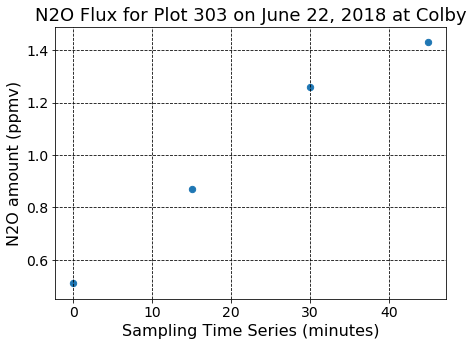

4    1.43
5    1.26
6    0.87
7    0.51
Name: N2O, dtype: float64

In [82]:
x_values = np.array([45, 30, 15, 0])  #Time series in minutes descending in order the gas samples were processed on the gas chromatograph
y_values = N2O_split.N2O[4:8]

plt.figure(figsize=(7,5))

plt.scatter(x_values, y_values, s=40, marker='o')
plt.rcParams['axes.grid'] = True
plt.grid(linestyle='--')
plt.rcParams['ytick.labelsize'] = 14.0
plt.rcParams['xtick.labelsize'] = 14.0
plt.title('N2O Flux for Plot 303 on June 22, 2018 at Colby', fontsize=18)
plt.xlabel('Sampling Time Series (minutes)', fontsize=16)
plt.ylabel('N2O amount (ppmv)', fontsize=16)
plt.show()

x_values
y_values

In [83]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(slope)
print(intercept)


0.021
0.545


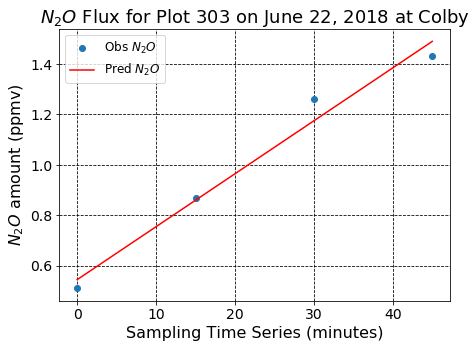

In [84]:
y_pred = intercept + slope*x_values

plt.figure(figsize=(7,5))
plt.plot(x_values, y_values,'o', label= 'Obs $N_2O$')
plt.plot(x_values, y_pred,'-r', label= 'Pred $N_2O$')
plt.grid(linestyle='--')
plt.rcParams['grid.color'] = 'k'
plt.rcParams['ytick.labelsize'] = 14.0
plt.rcParams['xtick.labelsize'] = 14.0
plt.legend(fontsize=12)
plt.title('$N_2O$ Flux for Plot 303 on June 22, 2018 at Colby', fontsize=18)
plt.xlabel('Sampling Time Series (minutes)', fontsize=16)
plt.ylabel('$N_2O$ amount (ppmv)', fontsize=16)
plt.show()

In [81]:
N2O_split = N2O_split.reset_index(drop = True)

y_data = []
x_data = [45, 30, 15, 0]

Plot_List = list(N2O_split.Plot)
Plot_List = list(dict.fromkeys(Plot_List))

results = pd.DataFrame(Plot_List)
results.columns = ['Plot']
results.insert(1, 'N2O_Slope', '')
results.insert(2, 'intercept', '')
results.insert(3, 'r_value', '')
results.insert(4, 'p_value', '')
results.insert(5, 'std_err', '')

count = 0

for x in Plot_List:
    for y in range(0, len(N2O_split.Plot)):
        if N2O_split.Plot[y] == x:
            y_data.append(N2O_split.N2O[y])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    results.N2O_Slope[count] = slope
    results.intercept[count] = intercept
    results.r_value[count] = r_value
    results.p_value[count] = p_value
    results.std_err[count] = std_err
    count += 1
    y_data = []

results

,Plot,N2O_Slope,intercept,r_value,p_value,std_err
0,304,0,0.495,0,1,0.000210819
1,303,0.021,0.545,0.987976,0.0120245,0.00232379
2,302B,0.00266667,0.5,1,1.11032e-16,2.80979e-11
3,302,0.0404667,0.517,0.99907,0.000929631,0.00123468
4,301,0.0428,0.592,0.990698,0.00930173,0.00415692
5,204,0.0006,0.489,0.923381,0.0766195,0.000176383
6,203B,0.0024,0.501,0.99846,0.00153965,9.42809e-05
7,203,0.016,0.485,0.996374,0.00362602,0.000966092
8,202,0.00873333,0.506,0.99843,0.00156963,0.00034641
9,201,0.0199333,0.549,0.983984,0.0160161,0.00255343


#### I have an Excel spreadsheet that has already calculated the flux values as slopes for the 2018 N2O data. The slope my code calculated matches the slope in the Excel spreadsheet.

#### I am currently working on setting up the iteration to calculate slope for each plot. Haven't quite figured out the structure of the loop to iterate over individual plots.